In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import tensorflow as tf
import random
import copy
import heapq
import math
import time

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alice.txt to Alice.txt
Saving attaker.txt to attaker.txt
Saving Bob.txt to Bob.txt


In [ ]:
df = pd.read_csv("/content/Alice.txt",sep = ", ", header = None, encoding="ISO-8859-1")
df_1 = pd.read_csv("/content/Bob.txt",sep = ", ",header = None,encoding="ISO-8859-1")
df_2 = pd.read_csv("/content/attaker.txt",sep = ", ",header = None, encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.columns = ["data","RSSI"]
df_1.columns =["data","RSSI"]
df_2.columns = ["data","RSSI","attaker"]


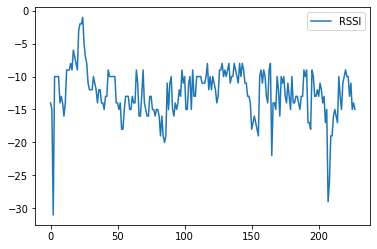

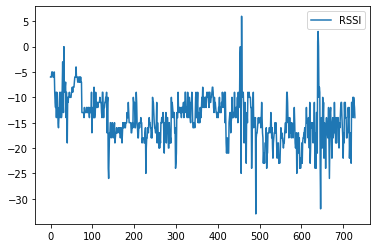

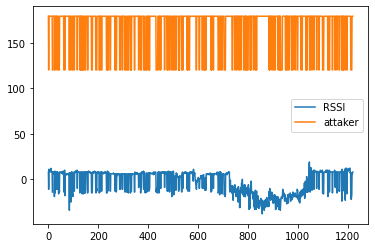

In [ ]:
df.plot()
df_1.plot()
df_2.plot()


plt.show()

##FILTER

In [ ]:
RSSI_1 = []
RSSI_2= []
RSSI_temp = []
RSSI_3= []
RSSI_4 = []

RSSI_temp1 = df_2.data.unique()


for i in range(1,len(df)):
  for j in range(1,len(df_1)):
        if (df["data"][i]) == (df_1["data"][j]):
         RSSI_1.append(df["RSSI"][i])
         RSSI_2.append(df_1["RSSI"][j])
         RSSI_temp.append(df_1["data"][j])


for i in range(1,len(RSSI_temp)):
  for j in range(1,len(RSSI_temp1)):
    if RSSI_temp[i] == RSSI_temp1[j]:
        RSSI_3.append(df_2["RSSI"][j])
        RSSI_4.append(df_2["RSSI"][j])

##QUANTIZATION

In [ ]:
print(len(RSSI_1))
minRSSI_1 = np.min(RSSI_1)
minRSSI_1

186


-29

In [ ]:
maxRSSI_1 = np.max(RSSI_1)
maxRSSI_1

-1

In [ ]:
print(len(RSSI_2))
maxRSSI_2 = np.max(RSSI_2)
maxRSSI_2

186


0

In [ ]:
print(len(RSSI_3))
minRSSI_2 = np.min(RSSI_2)
minRSSI_2

183


-25

In [ ]:
minRSSI_3 = np.min(RSSI_3)

In [ ]:
maxRSSI_3 = np.max(RSSI_3)

In [ ]:
print(len(RSSI_4))
minRSSI_4 = np.min(RSSI_4)

183


In [ ]:
maxRSSI_4 = np.max(RSSI_4)

In [ ]:
RSSI_a= maxRSSI_1-minRSSI_1

In [ ]:
RSSI_a

28

In [ ]:
RSSI_b = maxRSSI_2-minRSSI_2

In [ ]:
RSSI_b

25

In [ ]:
RSSI_c = maxRSSI_3 - minRSSI_3

In [ ]:
RSSI_c

42.0

In [ ]:
RSSI_d = maxRSSI_4 - minRSSI_4

In [ ]:
RSSI_d

42.0

In [ ]:
tn=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
n = len(RSSI_1)
n2 = len(RSSI_3)
ea = []
eb = []
eae = []
ebe = []
a = []
b = []
be = []
ea = []
aea = []
beb = []
x_atemp = []
x_btemp = []
x_aetemp = []
x_betemp = []

In [ ]:
from numpy.ma.core import log
for i in range(0,len(tn)):
    x_a = []
    x_b = []
    x_ae = []
    x_be = []
    for j in range(1,n):
      if (RSSI_1[j] > (minRSSI_1 + tn[i]*RSSI_a)):
        x_a.append(1)
      else:
        x_a.append(0)
      if (RSSI_2[j] > (minRSSI_2 + tn[i]*minRSSI_2 )):
        x_b.append(1)
      else:
        x_b.append(0)
      p1a = (sum(x_a))/(n)
      p1b = (sum(x_b))/(n)
      ea.append(sum([i for i in x_a+x_b if i in x_a or i in x_b])/n)

      if j in range(len(RSSI_3)):
        if(RSSI_3[j] > (minRSSI_3 + (tn[i]*RSSI_c))):
          x_ae.append(1)
        else:
          x_ae.append(0)
        if(RSSI_4[j] > (minRSSI_4 + (tn[i]*RSSI_d))):
          x_be.append(1)
        else:
          x_be.append(0)

        p1ae = sum(x_ae)/n
    
        eae.append(sum([k for k in x_ae+x_atemp if k in x_ae or k in x_atemp]) / n)
    if p1a == 0:
        continue
    else:
        a_temp = p1a*(np.math.log(1/p1a,2)) + (1-p1a)*(np.math.log(1/(1-p1a),2))
        a.append(a_temp)
        x_atemp.append(a_temp)
        
    if p1ae == 0:
        continue
    else:
       ae_temp = p1ae*(np.math.log(1/p1ae,2)) + (1-p1ae)*(np.math.log(1/(1-p1ae),2))
       ea.append(ae_temp)
    p1be = sum(x_be)/n

    ebe_temp = p1be*(np.math.log(1/p1be,2)) + (1-p1be)*(np.math.log(1/(1-p1be),2)) 
    ebe.append(ebe_temp)
print(len(ea))

1674


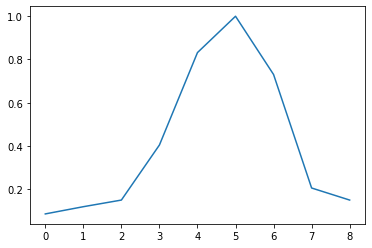

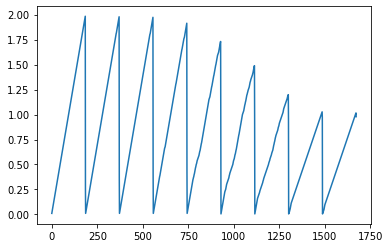

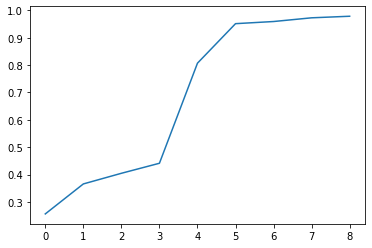

In [ ]:
plt.plot(a)
plt.show()
plt.plot(ea)
plt.show()
plt.plot(ebe)
plt.show()

In [ ]:
x_ar = []
r_a = []
x_br = []
error_a_b = []
x_br_error = []
error_key =[]
def rand_key(p):

    key1 = ""

    for i in range(p):
         
     
        temp = str(random.randint(0, 1))
 
        key1 += temp
         
    return(key1)
 

n = len(x_b)
str1 = rand_key(n)
r_atemp = list(str1)
r_a = [int(x) for x in r_atemp]
for i in range(len(x_a)):
  x_ar.append(((x_a[i])^(r_a[i])))
  x_br.append(((x_b[i])^(x_ar[i])))
  error_a_b.append(((x_a[i])^(x_b[i])))
for i in range(len(x_ar)):
  x_btemp.append(((x_b[i])^(x_ar[i])))

for i in range(len(x_br)):
  if x_br[i] + error_a_b[i] == 1:
    x_br_error.append(1)
  elif x_br[i] + error_a_b[i] == 0:
    x_br_error.append(0)
  elif x_br[i] + error_a_b[i] == 2:
    x_br_error.append(0)
    x_br_error.append(x_br[i-1] + error_a_b[i-1] + 1)
  else:
    x_br_error.append(1)
if x_br_error == x_a:
    print("EQUAL KEYS")
else:
    print("UNEQUAL KEYS")
for i in range(len(x_a)):
  error_key.append(((x_a[i])^(x_br_error[i])))
errorkey1 = sum(error_key)
erorinkey = (errorkey1)/(len(x_br_error))

print(f"SIMILARITY IN KEY IS {erorinkey*100}%")

UNEQUAL KEYS
SIMILARITY IN KEY IS 78.81040892193309%


In [ ]:
def Cascade(x_a,x_br):
  for i in range(len(x_a)):
    if x_a[i] == x_br[i]:
      continue
    else:
      x_br[i] = x_a[i]

Cascade(x_a,x_br)

In [ ]:
if x_a == x_br:
  print("Equal keys")
else:
  print("Unequal keys")


xtemp1 = ''.join(str(x_a).replace('[','').replace(']','').split(','))
xtemp2 = ''.join(str(x_br).replace('[','').replace(']','').split(','))



Equal keys


In [ ]:
f1 = open("x_a.pi","w")
for i in range(len(xtemp1)):
  f1.write(''.join(str(xtemp1)))
f1.close

<function TextIOWrapper.close>

In [ ]:
f1 = open("x_br.pi","w")
for i in range(len(xtemp2)):
  f1.write(''.join(str(xtemp2)))
f1.close

<function TextIOWrapper.close>